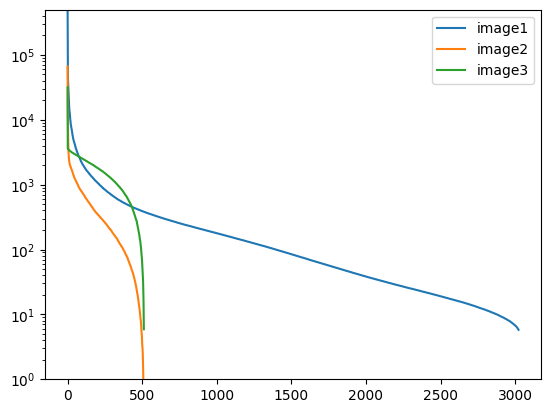

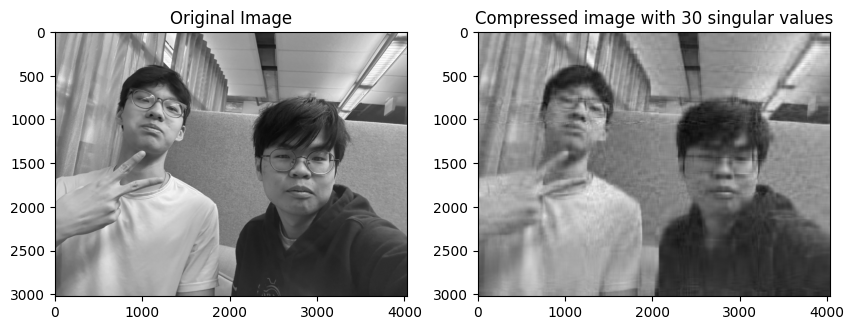

FOR IMAGE 1
Image size: (3024, 4032)
Memory before compression: 12192768 bytes
Memory after compression: 1693680 bytes
Compression ratio: 7.1989797364319115
Memory saved: 10499088 bytes


In [15]:
# notebook created Jan 2025
# by Philipp Seiler, University of Toronto Institute for Aerospace Studies
# 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Number of singular values to use when creating compressed image (try modifying it)
k = 30

# Load and preprocess the image
A1 = Image.open('1-813de7b0.png').convert('L')
A1_array=np.array(A1)
A1_double = A1_array.astype(np.float64)

A2 = Image.open('image2.png').convert('L')
A2_array=np.array(A2)
A2_double = A2_array.astype(np.float64)

A3 = Image.open('image3.png').convert('L')
A3_array=np.array(A3)
A3_double = A3_array.astype(np.float64)

# Perform Singular Value Decomposition
U1, S1, Vt1 = np.linalg.svd(A1_double, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(A2_double, full_matrices=False)
U3, S3, Vt3 = np.linalg.svd(A3_double, full_matrices=False)

# Reconstruct the image using the top k singular values
A1_compressed = np.dot(U1[:, :k], np.dot(np.diag(S1[:k]), Vt1[:k, :]))

# # you can use this code for plotting:

plt.plot(S1, label = "image1")
plt.plot(S2, label = "image2")
plt.plot(S3, label = "image3")
plt.ylim(1E0)
plt.legend()
plt.yscale('log')
plt.show()

# Display the original and compressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(A1, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(A1_compressed, cmap='gray')
plt.title(f'Compressed image with {k} singular values')

plt.show()

memoryBefore = A1_array.nbytes
memoryAfter = U1[:, :k].nbytes + S1[:k].nbytes + Vt1[:k, :].nbytes
compressionRatio = memoryBefore/memoryAfter
print("FOR IMAGE 1")
print(f"Image size: {A1_array.shape}")
print(f"Memory before compression: {memoryBefore} bytes")
print(f"Memory after compression: {memoryAfter} bytes")
print(f"Compression ratio: {compressionRatio}")
print(f"Memory saved: {memoryBefore - memoryAfter} bytes")